<a href="https://colab.research.google.com/github/Kahkeshan04/Senchola/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Titanic DS.xlsx')

In [ ]:
# Shape (1309, 11)
df.shape

(1309, 11)

In [ ]:
# Previewing the data
df.head()

,pclass,survived,name,Unnamed: 3,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",NaN,female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",NaN,male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",NaN,female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",NaN,male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",NaN,female,25.0000,1,2,113781,151.5500,S


In [ ]:
# Listing down the column
df.columns.values

array(['pclass', 'survived', 'name', 'Unnamed: 3', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'], dtype=object)

# Categorical Columns


*   Survived
*   PClass
*   Sex
*   SibSp
*   Parch
*   Embarked

# Numerical Columns

*   Age
*   Fare

# Mixed Columns

*  Name
*  Ticket



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  embarked    1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [ ]:
df.isnull().sum()

pclass           0
survived         0
name             0
Unnamed: 3    1309
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
embarked         2
dtype: int64

# Few Conclusions

1.   Missing values in Age, Fare, Unnamed and Embarked columns
2.   Unnamed columns doesn't contain any values so will have to drop it



In [ ]:
# Dropping Unnamed Column

df.drop(columns=['Unnamed: 3'],inplace = True)

In [ ]:
# Imputing missing values for Age
# Strategy - mean

df['age'].fillna(df['age'].mean(), inplace = True)

In [ ]:
# Imputing missing values for Embarked
# Finding the most appeared value in embarked column

df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
# S is highly repeated to replacing the empty value with S
df['embarked'].fillna('S', inplace = True)

In [ ]:
# Count of SibSp
df['sibsp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [ ]:
# Count of Parch
df['parch'].value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

# Changing data type for the following cols


*   Survived (Category)
*   PClass (Category)
*   Sex (Category)
*   Age (Category)
*   Embarked (Category)



In [ ]:
df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   category
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1309 non-null   category
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   ticket    1309 non-null   object  
 8   fare      1308 non-null   float64 
 9   embarked  1309 non-null   category
dtypes: category(5), float64(1), int64(2), object(2)
memory usage: 61.0+ KB


In [ ]:
df.describe()

,sibsp,parch,fare
count,1309.000000,1309.000000,1308.000000
mean,0.498854,0.385027,33.295479
std,1.041658,0.865560,51.758668
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.895800
50%,0.000000,0.000000,14.454200
75%,1.000000,0.000000,31.275000
max,8.000000,9.000000,512.329200


Out of 1309 62 % people died in the accident


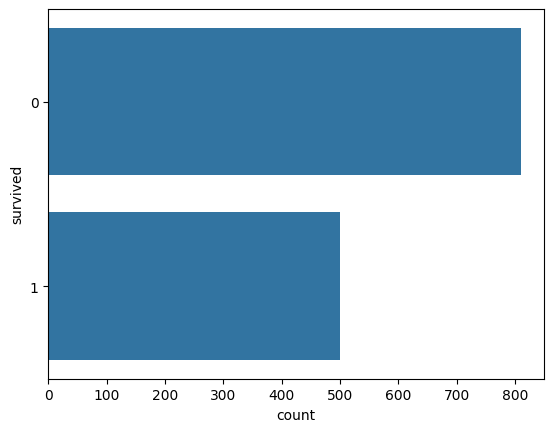

In [ ]:
# Univariate Analysis

#Let's start with the Survived Col

sns.countplot(df['survived'])

# We use value_counts(normalize=True) to get the proportion of each value (survived or not survived) in the 'Survived' column.
# We access the count of non-survivors (0s) using index [0] and multiply it by 100 to get the percentage.
# We round the result to two decimal places for better readability.
# death_percent = round((df['survived'].value_counts(normalize=True)[0] * 100), 2)

death_percent = round((df['survived'].value_counts().values[0]/1309)*100)
print("Out of 1309 {} % people died in the accident". format(death_percent))

3    54.163484
1    24.675325
2    21.161192
Name: pclass, dtype: float64


<Axes: xlabel='count', ylabel='pclass'>

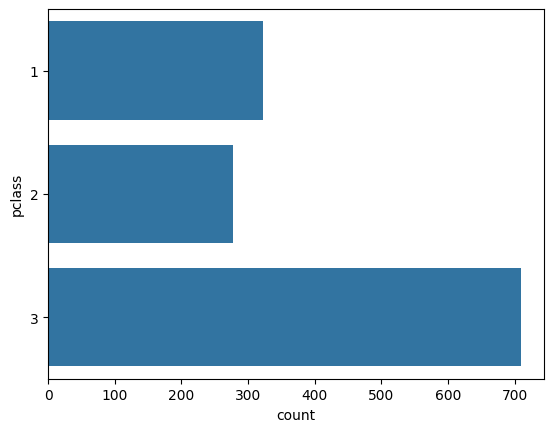

In [ ]:
# Pclass Column
print((df['pclass'].value_counts()/1309)*100)
sns.countplot(df['pclass'])
# Counclusion: PClass was the most crowded class

male      64.400306
female    35.599694
Name: sex, dtype: float64


<Axes: xlabel='count', ylabel='sex'>

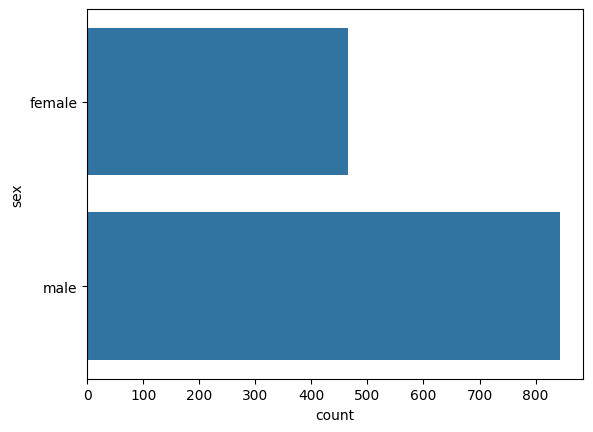

In [ ]:
print((df['sex'].value_counts()/1309)*100)
sns.countplot(df['sex'])

In [ ]:
# Save the DataFrame back to the same Excel file
df.to_excel('/content/Titanic DS.xlsx', index=False)